# Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preview Data

In [2]:
ad = pd.read_excel('Adidas US Sales Datasets.xlsx')

In [3]:
ad.head()

,Retailer,Retailer ID,Invoice Date,Region,State,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
ad.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


In [5]:
ad.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [6]:
ad.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

### Total Sales

In [7]:
ad['Total Sales'].sum()

899902125.0

### Total Profit

In [8]:
ad['Operating Profit'].sum()

332134761.45000005

### Total Unit Sold

In [9]:
ad['Units Sold'].sum()

2478861

### Total Sales and Profit by Retailera

In [10]:
tsp = ad.groupby(['Retailer'], as_index=False)[['Total Sales', 'Operating Profit']].sum()

In [11]:
tsp

,Retailer,Total Sales,Operating Profit
0,Amazon,77698912.0,28818503.31
1,Foot Locker,220094720.0,80722124.81
2,Kohl's,102114753.0,36811252.58
3,Sports Direct,182470997.0,74332954.96
4,Walmart,74558410.0,25782052.61
5,West Gear,242964333.0,85667873.18


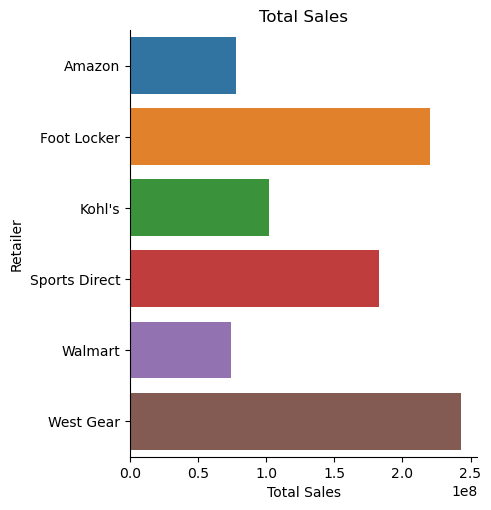

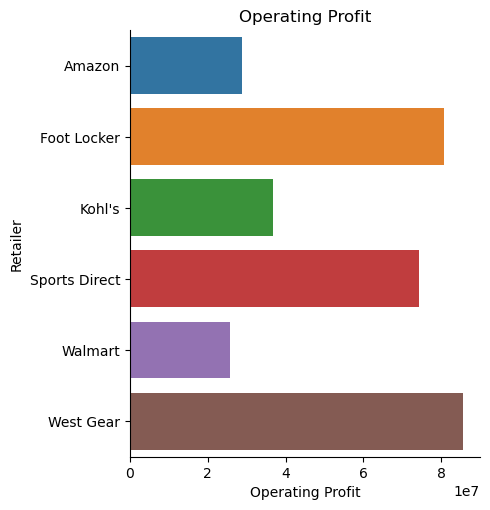

In [12]:
sns.catplot(x='Total Sales', y='Retailer', kind='bar', data=tsp)
plt.title('Total Sales')
sns.catplot(x='Operating Profit', y='Retailer', kind='bar', data=tsp)
plt.title('Operating Profit')
plt.show()

### Total Sales and Profit by Region

In [13]:
rsp = ad.groupby(['Region'], as_index=False)[['Total Sales', 'Operating Profit']].sum()

In [14]:
rsp

,Region,Total Sales,Operating Profit
0,Midwest,135800459.0,52811346.48
1,Northeast,186324067.0,68020587.65
2,South,144663181.0,61138004.07
3,Southeast,163171236.0,60555416.70
4,West,269943182.0,89609406.55


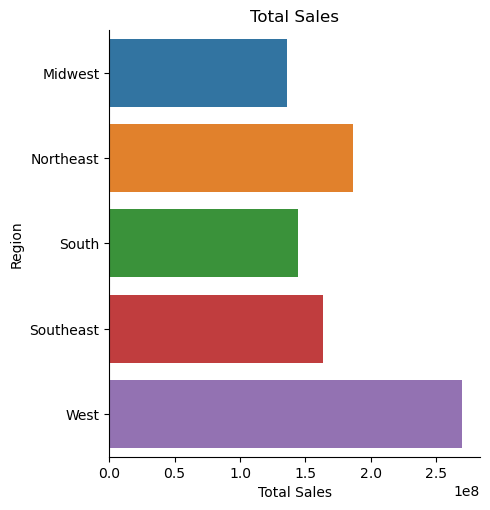

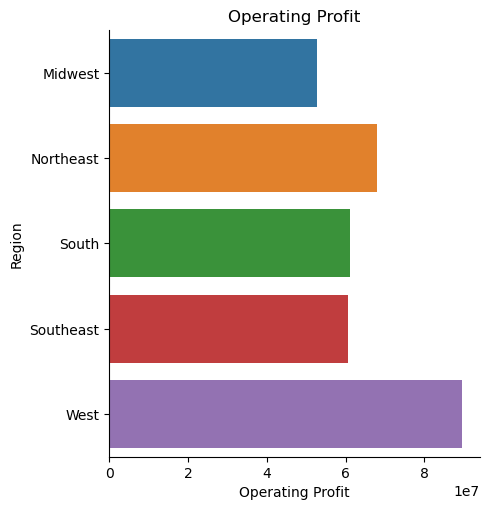

In [15]:
sns.catplot(x='Total Sales', y='Region', kind='bar', data=rsp)
plt.title('Total Sales')
sns.catplot(x='Operating Profit', y='Region', kind='bar', data=rsp)
plt.title('Operating Profit')
plt.show()

### Total Sales by Products

In [16]:
pts = ad.groupby(['Product'], as_index=False)['Total Sales'].sum()

In [17]:
pts

,Product,Total Sales
0,Men's Apparel,123728632.0
1,Men's Athletic Footwear,153673680.0
2,Men's Street Footwear,208826244.0
3,Women's Apparel,179038860.0
4,Women's Athletic Footwear,106631896.0
5,Women's Street Footwear,128002813.0


Text(0.5, 1.0, 'Total Sales')

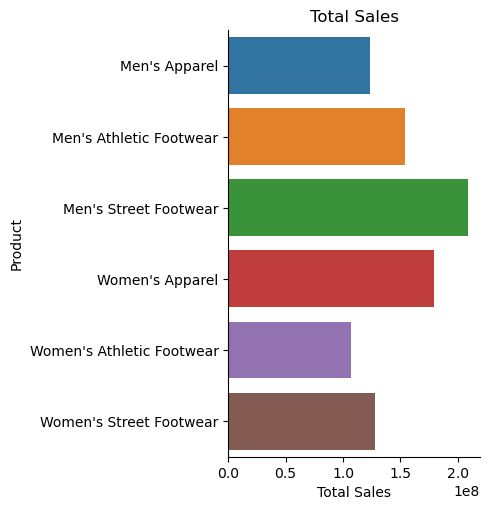

In [18]:
sns.catplot(x='Total Sales', y='Product', kind='bar', data=pts)
plt.title('Total Sales')

### Top 10 States by Sales

In [19]:
ts = ad.groupby(['State'], as_index=False)['Total Sales'].sum()

In [20]:
top10 = ts.nlargest(n=10, columns='Total Sales')

In [21]:
top10

,State,Total Sales
31,New York,64229039.0
4,California,60174133.0
8,Florida,59283714.0
42,Texas,46359746.0
39,South Carolina,29285637.0
46,Washington,26330718.0
32,North Carolina,23956531.0
17,Louisiana,23750781.0
10,Hawaii,22282457.0
45,Virginia,21575040.0


Text(0.5, 1.0, 'Top 10 States')

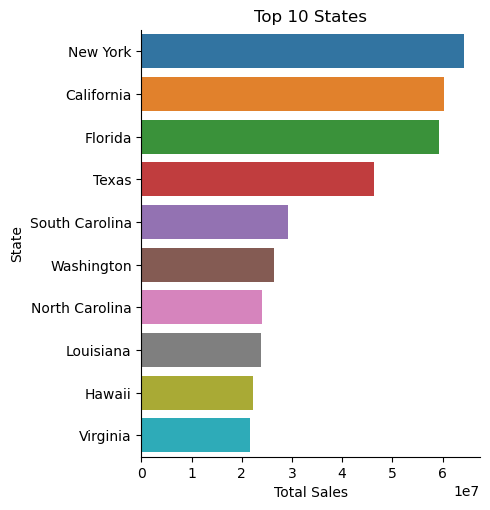

In [22]:
sns.catplot(x='Total Sales', y='State', kind='bar', data=top10)
plt.title('Top 10 States')

## Prepair Data for Forecasting

In [23]:
ft = ad[['Total Sales', 'Invoice Date']]

In [24]:
ft.columns = ['y', 'ds']

In [25]:
ft.head()

,y,ds
0,600000.0,2020-01-01
1,500000.0,2020-01-02
2,400000.0,2020-01-03
3,382500.0,2020-01-04
4,540000.0,2020-01-05


## Import Library for Forecasting

In [26]:
from prophet import Prophet 

In [27]:
ml = Prophet(interval_width=0.90, daily_seasonality=True)

In [28]:
model = ml.fit(ft)

11:10:29 - cmdstanpy - INFO - Chain [1] start processing
11:10:31 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = ml.make_future_dataframe(periods=100, freq='D')

In [30]:
forecast = ml.predict(future)

In [31]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,513637.575000,-69369.415060,369992.662444,513637.575000,513637.575000,-359507.222915,-359507.222915,-359507.222915,-344473.8,...,-1044.468796,-1044.468796,-1044.468796,-13988.954120,-13988.954120,-13988.954120,0.0,0.0,0.0,154130.352085
1,2020-01-02,513483.105616,-59277.920483,393107.652264,513483.105616,513483.105616,-348672.691212,-348672.691212,-348672.691212,-344473.8,...,12780.454500,12780.454500,12780.454500,-16979.345712,-16979.345712,-16979.345712,0.0,0.0,0.0,164810.414405
2,2020-01-03,513328.636233,-69520.798832,381003.938640,513328.636233,513328.636233,-358396.329162,-358396.329162,-358396.329162,-344473.8,...,5921.587006,5921.587006,5921.587006,-19844.116169,-19844.116169,-19844.116169,0.0,0.0,0.0,154932.307070
3,2020-01-04,513174.166849,-90137.968974,355576.081186,513174.166849,513174.166849,-376189.974640,-376189.974640,-376189.974640,-344473.8,...,-9167.878559,-9167.878559,-9167.878559,-22548.296081,-22548.296081,-22548.296081,0.0,0.0,0.0,136984.192209
4,2020-01-05,513019.697466,-88518.201472,367159.532106,513019.697466,513019.697466,-373401.891626,-373401.891626,-373401.891626,-344473.8,...,-3868.473200,-3868.473200,-3868.473200,-25059.618426,-25059.618426,-25059.618426,0.0,0.0,0.0,139617.805839


### Forecast Plot

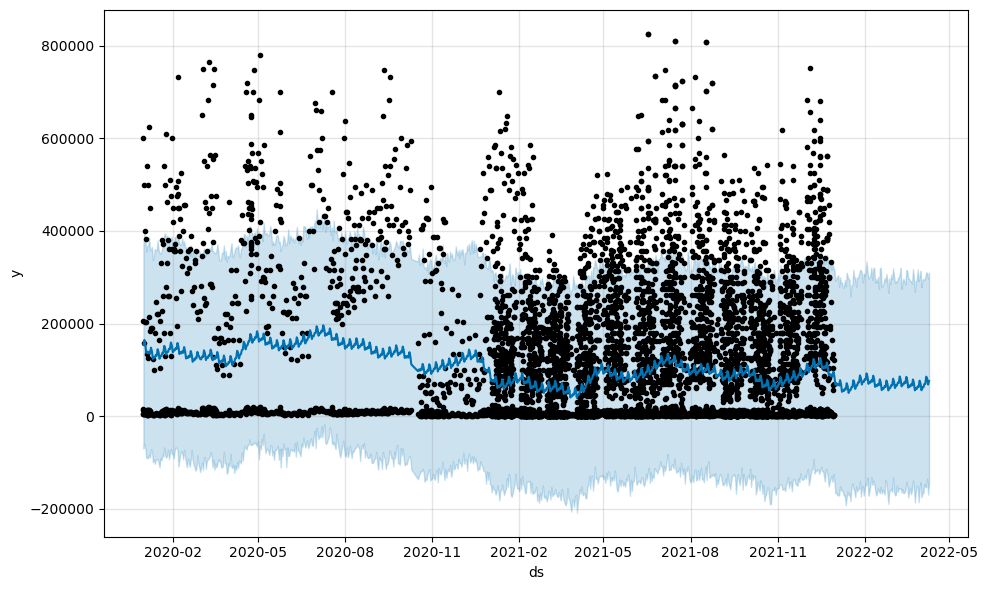

In [32]:
forecast_plot = ml.plot(forecast)

### Trend Plot

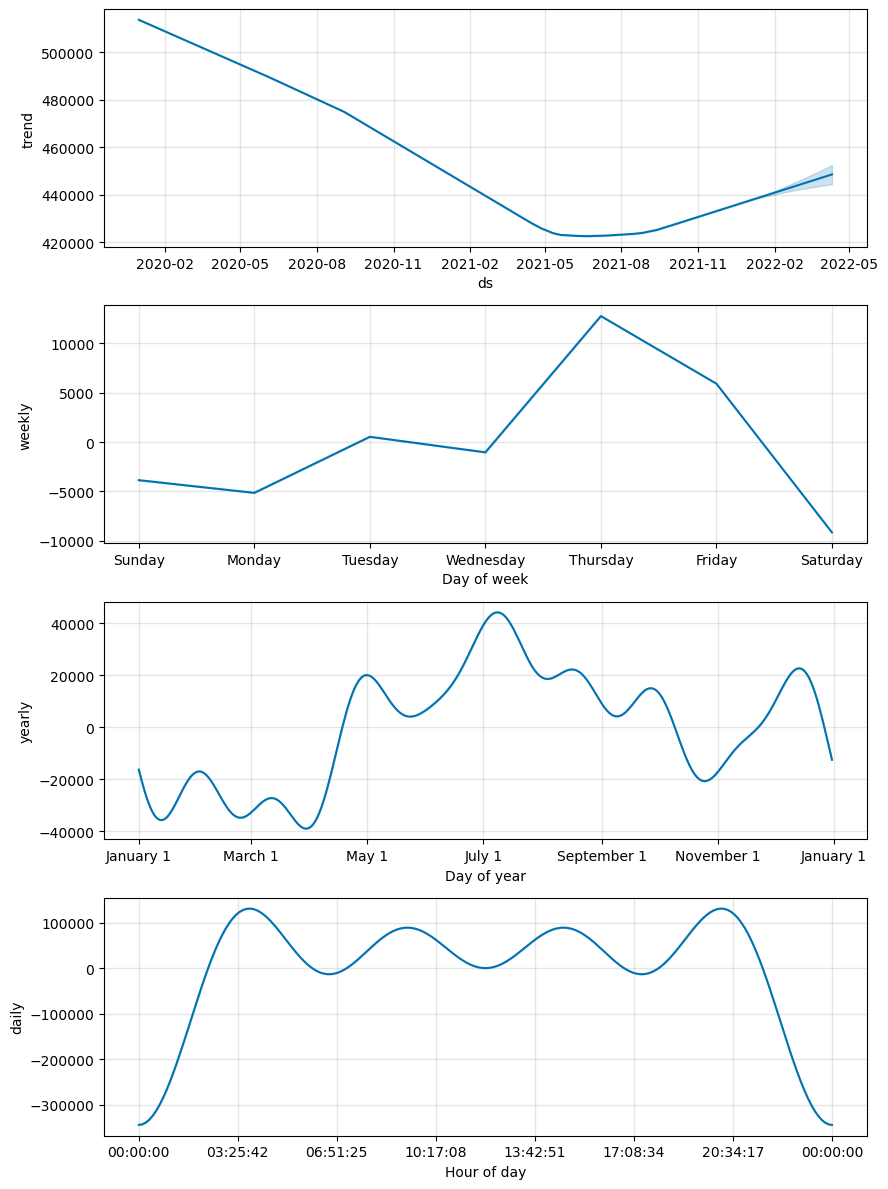

In [37]:
trend_plot = ml.plot_components(forecast)